# What key signatures should I practise for jazz?

Assume that we can do this based on frequencies of key signatures in existing jazz standards

Data downloaded from: https://jazzomat.hfm-weimar.de/download/download.html

Reference page with database documentation: https://jazzomat.hfm-weimar.de/dbformat/dbformat.html

In [1]:
import sqlite3

In [2]:
import pandas as pd

In [7]:
conn = sqlite3.connect("wjazzd.db")

Look at the `solos` table to get one row per solo (i.e. songs may be duplicated)

In [10]:
solos = pd.read_sql("SELECT * FROM solo_info", con=conn)
solos.head()

,melid,trackid,compid,recordid,performer,title,titleaddon,solopart,instrument,style,avgtempo,tempoclass,rhythmfeel,key,signature,chord_changes,chorus_count
0,1,1,1,1,Art Pepper,Anthropology,,1,cl,COOL,218.8,UP,SWING,Bb-maj,4/4,A1: ||Bb6 G7 |C-7 F7 |Bb G-7 |C-7 F7 |F-7 Bb7 ...,4
1,2,2,2,2,Art Pepper,Blues for Blanche,,1,as,COOL,198.9,UP,SWING,Eb-maj,4/4,A1: ||Eb7 |Ab7 |Eb7 |Eb7 |Ab7 |Ab7 ...,11
2,3,3,3,1,Art Pepper,Desafinado,,1,as,COOL,140.5,MEDIUM UP,LATIN,F-maj,4/4,A1: ||Fj7 |Fj7 |G7alt |G7alt |G-7 |C...,2
3,4,4,4,1,Art Pepper,In a Mellow Tone,,1,cl,COOL,167.6,MEDIUM UP,SWING,Eb-maj,4/4,A1: ||F7 |Bb7 |Eb6 |Eb6 |Bb-7 |Eb7 ...,4
4,5,5,5,2,Art Pepper,Stardust,,1,as,COOL,60.7,SLOW,BALLAD,Eb-maj,4/4,A1: ||Ab6 |Ab6 |Ab-6 |Ab-6 Db7 |Eb F-7 |...,2


In [11]:
solos["key"].unique()

array(['Bb-maj', 'Eb-maj', 'F-maj', 'Db-maj', 'C-maj', 'G-maj', 'Ab-maj',
       'D-maj', 'C-min', 'G-min', 'D-dor', 'F-min', 'Bb-min', 'D-chrom',
       'D-min', 'Db-min', 'F#-min', 'E-min', 'F#-chrom', 'A-min', '',
       'Bb-blues', 'Eb-min', 'B-maj', 'E-maj', 'D#-maj', 'Ab', 'C-chrom',
       'C#-maj', 'Ab-mix', 'Db-chrom', 'Eb-chrom', 'B-chrom'],
      dtype=object)

Look at the frequency of the key column (so not grouping major and minor together)

In [58]:
solos["key"].value_counts().head(10)

Bb-maj    75
F-maj     71
Eb-maj    55
C-maj     38
Ab-maj    33
Db-maj    31
          27
G-maj     24
C-min     21
G-min     16
Name: key, dtype: int64

In [15]:
def extract_key_signature(key_string):
    # if there's a hyphen, grab everything before it
    if "-" in key_string:
        return key_string[:key_string.index("-")]
    else:
        return key_string
    
solos["key_signature"] = solos["key"].apply(extract_key_signature)

solos.head()

,melid,trackid,compid,recordid,performer,title,titleaddon,solopart,instrument,style,avgtempo,tempoclass,rhythmfeel,key,signature,chord_changes,chorus_count,key_signature
0,1,1,1,1,Art Pepper,Anthropology,,1,cl,COOL,218.8,UP,SWING,Bb-maj,4/4,A1: ||Bb6 G7 |C-7 F7 |Bb G-7 |C-7 F7 |F-7 Bb7 ...,4,Bb
1,2,2,2,2,Art Pepper,Blues for Blanche,,1,as,COOL,198.9,UP,SWING,Eb-maj,4/4,A1: ||Eb7 |Ab7 |Eb7 |Eb7 |Ab7 |Ab7 ...,11,Eb
2,3,3,3,1,Art Pepper,Desafinado,,1,as,COOL,140.5,MEDIUM UP,LATIN,F-maj,4/4,A1: ||Fj7 |Fj7 |G7alt |G7alt |G-7 |C...,2,F
3,4,4,4,1,Art Pepper,In a Mellow Tone,,1,cl,COOL,167.6,MEDIUM UP,SWING,Eb-maj,4/4,A1: ||F7 |Bb7 |Eb6 |Eb6 |Bb-7 |Eb7 ...,4,Eb
4,5,5,5,2,Art Pepper,Stardust,,1,as,COOL,60.7,SLOW,BALLAD,Eb-maj,4/4,A1: ||Ab6 |Ab6 |Ab-6 |Ab-6 Db7 |Eb F-7 |...,2,Eb


In [16]:
solos.tail()

,melid,trackid,compid,recordid,performer,title,titleaddon,solopart,instrument,style,avgtempo,tempoclass,rhythmfeel,key,signature,chord_changes,chorus_count,key_signature
451,452,343,302,183,Zoot Sims,Dancing in the Dark,,1,ts,COOL,124.7,MEDIUM,SWING,Ab-maj,4/4,A1: ||Abj7 |Abj7 |Abo7 |Abo7 |Bb-7 |...,1,Ab
452,453,343,302,183,Zoot Sims,Dancing in the Dark,,2,ts,COOL,122.1,MEDIUM,SWING,Ab-maj,4/4,A1: ||Abj7 |Abj7 |Abo7 |Abo7 |Bb-7 |...,1,Ab
453,454,297,264,184,Zoot Sims,King David,,1,ts,COOL,151.1,MEDIUM UP,SWING,Bb-maj,4/4,A1: ||Bb7 |Eb7 |Bb7 |Bb7 |Eb7 |Eb7 ...,1,Bb
454,455,344,20,183,Zoot Sims,Night and Day,,1,ts,COOL,216.7,UP,SWING,D-maj,4/4,A1: ||Em7b5 |A7 |Dj7 |Dj7 |Em7b5 |A7...,2,D
455,456,344,20,183,Zoot Sims,Night and Day,,2,ts,COOL,217.6,UP,SWING,D-maj,4/4,B1: ||Fj7 |Fj7 |Dj7 |Dj7 |Fj7 |Fj7 ...,1,D


Let's see which songs have multiple solos

In [22]:
solo_key_counts = solos.groupby(["performer", "title"])["key_signature"].nunique()
solo_key_counts[solo_key_counts > 1]

Series([], Name: key_signature, dtype: int64)

None! We can then de-duplicate solos up to a song level and count the frequencies

In [24]:
solos[["performer", "title", "key_signature"]].drop_duplicates()

,performer,title,key_signature
0,Art Pepper,Anthropology,Bb
1,Art Pepper,Blues for Blanche,Eb
2,Art Pepper,Desafinado,F
3,Art Pepper,In a Mellow Tone,Eb
4,Art Pepper,Stardust,Eb
...,...,...,...
449,Wynton Marsalis,You're My Everything,B
450,Zoot Sims,All the Things You Are,Ab
451,Zoot Sims,Dancing in the Dark,Ab
453,Zoot Sims,King David,Bb


As an aside, which songs have the most solos?

In [26]:
solos.groupby(["performer", "title"])["key_signature"].count().sort_values(ascending=False).head(10)

performer      title                 
Sonny Rollins  Blue Seven                3
Zoot Sims      Night and Day             2
Roy Eldridge   The Gasser                2
Kenny Garrett  Brother Hubbard           2
Steve Coleman  The Oracle                2
               Cross-Fade                2
David Murray   Body and Soul             2
Sonny Rollins  The Everywhere Calypso    2
               St. Thomas                2
               Playin' in the Yard       2
Name: key_signature, dtype: int64

OK back to key signature frequencies

Trackid can be used to dedupe **per song**

In [66]:
solos.groupby("trackid")["key_signature"].nunique().sort_values()

trackid
1      1
235    1
234    1
233    1
232    1
      ..
79     2
164    2
237    2
212    2
223    2
Name: key_signature, Length: 344, dtype: int64

This is a song with two solos, different key information

In [67]:
solos[solos["trackid"] == 223]

,melid,trackid,compid,recordid,performer,title,titleaddon,solopart,instrument,style,avgtempo,tempoclass,rhythmfeel,key,signature,chord_changes,chorus_count,key_signature,missing_key
257,258,223,201,115,Kenny Wheeler,Double Vision,,1,tp,POSTBOP,155.1,MEDIUM UP,LATIN/FUNK,D#-maj,4/4,A1: ||D#7 |E7 |D#7 |E7 |D#7 |E7 |D...,1,D#,False
404,405,223,201,115,Steve Coleman,Double Vision,,1,ss,POSTBOP,242.2,UP,SWING,,4/4,A1: ||NC ||,1,,True


In [69]:
song_keys = solos[["trackid", "title", "key_signature"]].drop_duplicates()
song_keys.head()

,trackid,title,key_signature
0,1,Anthropology,Bb
1,2,Blues for Blanche,Eb
2,3,Desafinado,F
3,4,In a Mellow Tone,Eb
4,5,Stardust,Eb


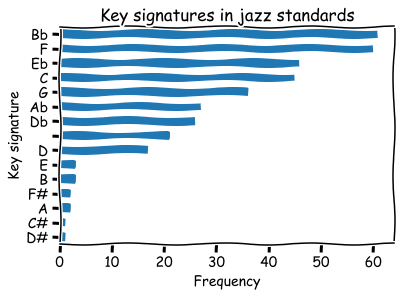

In [70]:
import matplotlib.pyplot as plt

plt.xkcd()

fig, ax = plt.subplots()

(
    song_keys["key_signature"]
    .value_counts()
    .sort_values(ascending=True)
    .plot.barh(ax=ax)
)

ax.set(title="Key signatures in jazz standards",
       xlabel="Frequency",
       ylabel="Key signature")

plt.show()

### Missing key signatures?

Let's look at some of those missing key signatures

In [37]:
missing_keys = solos[solos["key_signature"] == ""]
missing_keys.head()

,melid,trackid,compid,recordid,performer,title,titleaddon,solopart,instrument,style,avgtempo,tempoclass,rhythmfeel,key,signature,chord_changes,chorus_count,key_signature
165,166,149,134,73,Freddie Hubbard,Dolphin Dance,,1,tp,POSTBOP,118.9,MEDIUM,SWING,,4/4,A1: ||C-7 |Ab7911# |C-7 |A-7 D7 |Gj7 |...,2,
167,168,150,135,74,Freddie Hubbard,Maiden Voyage,,1,tp,POSTBOP,126.0,MEDIUM,SWING,,4/4,A1: ||Dsus7 |Dsus7 |Dsus7 |Dsus7 |Fsus...,2,
170,171,150,135,74,George Coleman,Maiden Voyage,,1,ts,POSTBOP,125.4,MEDIUM,SWING,,4/4,A1: ||Dsus7 |Dsus7 |Dsus7 |Dsus7 |Fsus...,1,
183,184,163,147,81,Herbie Hancock,Agitation,,1,p,POSTBOP,293.8,UP,SWING,,4/4,A1: ||NC |NC |NC |NC |NC |NC |NC ...,2,
184,185,164,148,82,Herbie Hancock,Dolores,,1,p,POSTBOP,282.3,UP,SWING,,4/4,A1: ||NC |NC |NC |NC |NC |NC |NC ...,1,


What "styles" account for a missing key signature?

In [38]:
missing_keys["style"].value_counts()

POSTBOP    18
FREE        5
FUSION      3
HARDBOP     1
Name: style, dtype: int64

In [43]:
solos["style"].value_counts()

POSTBOP        147
HARDBOP         76
SWING           66
BEBOP           56
COOL            54
TRADITIONAL     32
FUSION          20
FREE             5
Name: style, dtype: int64

What % of songs in each style have a missing key signature?

In [47]:
solos["missing_key"] = solos["key_signature"] == ""

(solos.groupby("style")["missing_key"].mean() * 100).sort_values(ascending=False)

style
FREE           100.000000
FUSION          15.000000
POSTBOP         12.244898
HARDBOP          1.315789
TRADITIONAL      0.000000
SWING            0.000000
COOL             0.000000
BEBOP            0.000000
Name: missing_key, dtype: float64

What about artists?

In [39]:
missing_keys["performer"].value_counts()

Ornette Coleman     5
Herbie Hancock      5
Steve Coleman       4
Miles Davis         3
Woody Shaw          2
Michael Brecker     2
Freddie Hubbard     2
John Abercrombie    1
George Coleman      1
Wayne Shorter       1
Steve Lacy          1
Name: performer, dtype: int64

In [42]:
solos[solos["performer"] == "Herbie Hancock"]

,melid,trackid,compid,recordid,performer,title,titleaddon,solopart,instrument,style,avgtempo,tempoclass,rhythmfeel,key,signature,chord_changes,chorus_count,key_signature
183,184,163,147,81,Herbie Hancock,Agitation,,1,p,POSTBOP,293.8,UP,SWING,,4/4,A1: ||NC |NC |NC |NC |NC |NC |NC ...,2,
184,185,164,148,82,Herbie Hancock,Dolores,,1,p,POSTBOP,282.3,UP,SWING,,4/4,A1: ||NC |NC |NC |NC |NC |NC |NC ...,1,
185,186,165,149,82,Herbie Hancock,Gingerbread Boy,,1,p,POSTBOP,285.8,UP,SWING,,4/4,A1: ||Bb7 |Bb7 |Bb7 |Bb7 |Eb7 |Eb7 ...,9,
186,187,166,150,83,Herbie Hancock,Hand Jive,,1,p,POSTBOP,262.1,UP,SWING,,4/4,A1: ||NC ||,1,
187,188,167,151,82,Herbie Hancock,Orbits,,1,p,POSTBOP,264.9,UP,SWING,,4/4,A1: ||NC ||,1,


What % of songs per artist have a missing key signature?

In [53]:
(
    solos
        .groupby("performer")
        ["missing_key"]
        .agg(["count", "mean"])
        .sort_values(by="mean", ascending=False)
        .head(10)
)

,count,mean
performer,,
Ornette Coleman,5,1.000000
John Abercrombie,1,1.000000
George Coleman,1,1.000000
Herbie Hancock,5,1.000000
Steve Coleman,10,0.400000
Freddie Hubbard,6,0.333333
Woody Shaw,8,0.250000
Michael Brecker,10,0.200000
Steve Lacy,6,0.166667


In [52]:
solos[solos["performer"] == "Ornette Coleman"]

,melid,trackid,compid,recordid,performer,title,titleaddon,solopart,instrument,style,avgtempo,tempoclass,rhythmfeel,key,signature,chord_changes,chorus_count,key_signature,missing_key
335,336,271,245,147,Ornette Coleman,Bird Food,,1,as,FREE,255.8,UP,SWING,,,A1: ||NC ||,1,,True
336,337,272,246,148,Ornette Coleman,Chronology,,1,as,FREE,236.0,UP,SWING,,,A1: ||NC ||,1,,True
337,338,273,247,148,Ornette Coleman,Congeniality,,1,as,FREE,232.6,UP,SWING,,,A1: ||NC ||,1,,True
338,339,274,248,148,Ornette Coleman,Peace,,1,as,FREE,125.7,MEDIUM,SWING,,,A1: ||NC ||,1,,True
339,340,275,249,147,Ornette Coleman,Ramblin',,1,as,FREE,201.3,UP,SWING,,,A1: ||D7|D7|D7|D7|D7|D7|D7|D7|D7|D7|D7|D7|D7|D...,1,,True


### Which songs have the most/least common key signatures?

In [55]:
solos.loc[solos["key_signature"] == "F", "key"].value_counts()

F-maj    71
F-min    12
Name: key, dtype: int64

In [56]:
solos.loc[solos["key_signature"] == "Bb", "key"].value_counts()

Bb-maj      75
Bb-min       5
Bb-blues     1
Name: key, dtype: int64

In [59]:
solos[solos["key_signature"].isin(["A", "B", "C#", "D#"])]

,melid,trackid,compid,recordid,performer,title,titleaddon,solopart,instrument,style,avgtempo,tempoclass,rhythmfeel,key,signature,chord_changes,chorus_count,key_signature,missing_key
153,154,138,125,69,Eric Dolphy,Aisha,,1,as,POSTBOP,62.9,SLOW,SWING,A-min,4/4,A1: ||A-79 |G-79 |A-79 |F-79 |F-7 Bb7 ...,1,A,False
207,208,184,165,91,Joe Lovano,Central Park West,,1,ts,POSTBOP,62.6,SLOW,SWING,B-maj,4/4,A1: ||Bj7 E-7A7|Dj7 Bb-7Eb7|Abj7 G-7C7|Fj7 C#-...,5,B,False
257,258,223,201,115,Kenny Wheeler,Double Vision,,1,tp,POSTBOP,155.1,MEDIUM UP,LATIN/FUNK,D#-maj,4/4,A1: ||D#7 |E7 |D#7 |E7 |D#7 |E7 |D...,1,D#,False
399,400,312,276,167,Stan Getz,I'm Glad There Is You,,1,ts,COOL,67.0,SLOW,SWING,C#-maj,4/4,A1: ||C#j7 |C#j7 |C#-7 |F#7913 |D#-7 ...,1,C#,False
400,401,313,277,167,Stan Getz,Insensatez,,1,ts,COOL,128.2,MEDIUM,LATIN,A-min,4/4,A1: ||A-79 |A-79 |G#o7 |G#o7 |G-6 |G...,1,A,False
432,433,331,291,178,Wayne Shorter,Juju,,1,ts,POSTBOP,178.2,MEDIUM UP,LATIN,B-chrom,3/4,A1: ||Bb+7 |Bb+7 |Bb+7 |Bb+7 |Bb+7 |Bb+7 ...,7,B,False
449,450,341,301,182,Wynton Marsalis,You're My Everything,,1,tp,POSTBOP,137.6,MEDIUM,SWING,B-maj,4/4,A1: ||Bj7 |Bj7 |F-7 Bb7 |Eb-7 Ab7 |Db-7 ...,1,B,False


In [72]:
song_keys[song_keys["key_signature"].isin(["F", "Bb"])].sample(10, random_state=44)

,trackid,title,key_signature
83,78,Togo,F
216,193,Blues by Five,Bb
375,302,Really the Blues,Bb
161,146,Good Bait,Bb
233,206,Trane's Blues,Bb
62,58,Scrapple from the Apple,F
34,31,No Moe,Bb
155,140,Les,F
299,248,Confirmation,F
115,109,Blues for Two,Bb


Final question: do we have multiple soloists on the same record?

In [64]:
solos.groupby("trackid")["performer"].nunique().sort_values(ascending=False).head(10)

trackid
204    3
43     3
210    3
39     3
40     3
41     3
162    3
224    3
164    3
167    3
Name: performer, dtype: int64

Yes! This meant we had to change how we de-duped songs, because to get one row **per song** you have to use track ID

In [73]:
solos[solos["trackid"].isin([204, 43, 210])].sort_values("trackid")

,melid,trackid,compid,recordid,performer,title,titleaddon,solopart,instrument,style,avgtempo,tempoclass,rhythmfeel,key,signature,chord_changes,chorus_count,key_signature,missing_key
47,48,43,43,19,Cannonball Adderley,So What,,1,as,POSTBOP,142.2,MEDIUM UP,SWING,D-dor,4/4,A1: ||D-7 |D-7 |D-7 |D-7 |D-7 |D-7 ...,2,D,False
232,233,43,43,19,John Coltrane,So What,,1,ts,POSTBOP,141.6,MEDIUM UP,SWING,D-maj,4/4,A1: ||D-7 |D-7 |D-7 |D-7 |D-7 |D-7 ...,2,D,False
322,323,43,43,19,Miles Davis,So What,,1,tp,POSTBOP,138.5,MEDIUM,SWING,D-maj,4/4,A1: ||D- |D- |D- |D- |D- |D- |D- ...,2,D,False
230,231,204,182,107,John Coltrane,Oleo,,1,ts,HARDBOP,266.2,UP,SWING,Bb-maj,4/4,A1: ||Bbj7 G7 |C-7 F7 |Bbj7 G7 |C- F7 |F-7 Bb7...,4,Bb,False
319,320,204,182,107,Miles Davis,Oleo,,1,tp,HARDBOP,271.1,UP,SWING,Bb-maj,4/4,A1: ||Bbj7 G7 |C-7 F7 |Bbj7 G7 |C-7 F7 |F-7 Bb...,2,Bb,False
320,321,204,182,107,Miles Davis,Oleo,,2,tp,HARDBOP,268.0,UP,SWING,Bb-maj,4/4,A1: ||Bbj7 G7 |C-7 F7 |Bbj7 G7 |C-7 F7 |F-7 Bb...,2,Bb,False
364,365,204,182,107,Red Garland,Oleo,,1,p,HARDBOP,264.9,UP,SWING,Bb-maj,4/4,A1: ||Bbj7 G7 |C-7 F7 |Bbj7 G7 |C-7 F7 |F-7 Bb...,2,Bb,False
237,238,210,188,108,Johnny Dodds,Muskrat Ramble,,1,cl,TRADITIONAL,185.1,UP,TWOBEAT,Ab-maj,4/4,A1: ||Bb7 |Eb7 |Ab |Ab Abo |Eb7 |Eb7 ...,1,Ab,False
262,263,210,188,108,Kid Ory,Muskrat Ramble,,1,tb,TRADITIONAL,184.0,UP,TWOBEAT,Ab-maj,4/4,A1: ||Ab |Ab Abo |Eb7 |Eb7 |Ab |Ab |...,1,Ab,False
295,296,210,188,108,Louis Armstrong,Muskrat Ramble,,1,cor,TRADITIONAL,183.7,UP,TWOBEAT,Ab-maj,4/4,A1: ||Bb7 |Eb7 |Ab |Ab Abo |Eb7 |Eb7 ...,1,Ab,False


Finally, let's see the distribution of instruments:

In [74]:
solos["instrument"].value_counts()

ts      157
tp      102
as       80
tb       26
ss       23
cor      15
cl       15
vib      12
bs       11
p         6
g         6
bcl       2
ts-c      1
Name: instrument, dtype: int64

In [75]:
solos[solos["instrument"] == "p"]

,melid,trackid,compid,recordid,performer,title,titleaddon,solopart,instrument,style,avgtempo,tempoclass,rhythmfeel,key,signature,chord_changes,chorus_count,key_signature,missing_key
183,184,163,147,81,Herbie Hancock,Agitation,,1,p,POSTBOP,293.8,UP,SWING,,4/4,A1: ||NC |NC |NC |NC |NC |NC |NC ...,2,,True
184,185,164,148,82,Herbie Hancock,Dolores,,1,p,POSTBOP,282.3,UP,SWING,,4/4,A1: ||NC |NC |NC |NC |NC |NC |NC ...,1,,True
185,186,165,149,82,Herbie Hancock,Gingerbread Boy,,1,p,POSTBOP,285.8,UP,SWING,,4/4,A1: ||Bb7 |Bb7 |Bb7 |Bb7 |Eb7 |Eb7 ...,9,,True
186,187,166,150,83,Herbie Hancock,Hand Jive,,1,p,POSTBOP,262.1,UP,SWING,,4/4,A1: ||NC ||,1,,True
187,188,167,151,82,Herbie Hancock,Orbits,,1,p,POSTBOP,264.9,UP,SWING,,4/4,A1: ||NC ||,1,,True
364,365,204,182,107,Red Garland,Oleo,,1,p,HARDBOP,264.9,UP,SWING,Bb-maj,4/4,A1: ||Bbj7 G7 |C-7 F7 |Bbj7 G7 |C-7 F7 |F-7 Bb...,2,Bb,False


In [76]:
solos[solos["instrument"] == "g"]

,melid,trackid,compid,recordid,performer,title,titleaddon,solopart,instrument,style,avgtempo,tempoclass,rhythmfeel,key,signature,chord_changes,chorus_count,key_signature,missing_key
213,214,190,171,95,John Abercrombie,Ralph's Piano Waltz,,1,g,POSTBOP,196.5,UP,SWING,,3/4,A1: ||G |G |Bb |Bb |Ebj7911# |Ebj7911# |...,3,,True
340,341,276,250,149,Pat Martino,Along Came Betty,,1,g,POSTBOP,132.7,MEDIUM,LATIN,Ab-maj,4/4,A1: ||Bb-7 |B-7 E7 |Bb-7 |B-7 E7 |Aj7 |A...,2,Ab,False
341,342,277,207,150,Pat Metheny,All the Things You Are,,1,g,POSTBOP,306.7,UP,SWING,F-maj,4/4,A1: ||F-7 |Bb-7 |Eb7 |Abj7 |Dbj7 |G7...,6,F,False
342,343,278,223,128,Pat Metheny,Cabin Fever,,1,g,POSTBOP,308.1,UP,SWING,Bb-maj,4/4,A1: ||Bb7 NC |Eb7 |Bb7 |Bb7 |Eb7 |Eb7 ...,8,Bb,False
343,344,279,227,128,Pat Metheny,Midnight Voyage,,1,g,POSTBOP,127.7,MEDIUM,SWING,C-min,4/4,A1: ||C-7 |G79b |C-7 |Asus7 |Ab7 |G7...,1,C,False
344,345,280,230,135,Pat Metheny,Nothing Personal,,1,g,POSTBOP,242.1,UP,SWING,G-min,4/4,A1: ||G- |G- |G- |G- |G- |G- |G- ...,3,G,False
